In [118]:
import pandas as pd
import src.plotting as pl
import seaborn as sns

In [47]:
tiros = pd.read_csv("./data/final_average_stats.csv")

In [48]:
tiros.head()

,Unnamed: 0,#,PLAYER_NAME,Team,GP,MIN,FGM,FGA,FG%,3PM,...,zona8_attempted,zona8_made,zona9_attempted,zona9_made,zona10_attempted,zona10_made,zona11_attempted,zona11_made,zona12_attempted,zona12_made
0,0,1,A.J. Slaughter,GCN,22,24.3,5.0,10.2,0.484,1.7,...,32.0,13.0,16.0,7.0,8.0,5.0,5.0,4.0,3.0,1.0
1,1,5,Aaron Doornekamp,CAN,31,25.6,2.6,6.1,0.431,2.0,...,31.0,13.0,4.0,1.0,25.0,16.0,8.0,2.0,6.0,4.0
2,2,15,Aaron Jones,BBB,8,19.7,1.6,3.9,0.419,0.4,...,4.0,1.0,2.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
3,3,2,Achille Polonara,CAJ,33,26.5,4.2,8.8,0.479,1.4,...,39.0,12.0,7.0,3.0,14.0,3.0,5.0,3.0,2.0,1.0
4,4,11,Adam Hanga,FCB,31,16.1,2.2,3.7,0.578,1.1,...,19.0,9.0,2.0,2.0,6.0,3.0,2.0,1.0,5.0,1.0


In [49]:
tiros.fillna(0, inplace = True)

In [50]:
tiros["% LEFT-CORNER-3"] = tiros["zona1_made"] / tiros["zona1_attempted"]
tiros["% LEFT-MIDR-2"] = tiros["zona2_made"] / tiros["zona2_attempted"]
tiros["% LEFT-ELBOW-3"] = tiros["zona3_made"] / tiros["zona3_attempted"]
tiros["% LEFT-ELB/CENT-2"] = tiros["zona4_made"] / tiros["zona4_attempted"]
tiros["% LEFT-CENTER-3"] = tiros["zona5_made"] / tiros["zona5attempted"]
tiros["% LEFT-PAINT"] = tiros["zona6_made"] / tiros["zona6_attempted"]
tiros["% RIGHT-PAINT"] = tiros["zona7_made"] / tiros["zona7_attempted"]
tiros["% RIGHT-CENTER-3"] = tiros["zona8_made"] / tiros["zona8_attempted"]
tiros["% RIGHT-ELB/CENT-2"] = tiros["zona9_made"] / tiros["zona9_attempted"]
tiros["% RIGHT-ELBOW-3"] = tiros["zona10_made"] / tiros["zona10_attempted"]
tiros["% RIGHT-MIDR-2"] = tiros["zona11_made"] / tiros["zona11_attempted"]
tiros["% RIGHT-CORNER-3"] = tiros["zona12_made"] / tiros["zona12_attempted"]

In [69]:
#Esto no lo podemos guardar en este Jupyter, Pablete

tiros.to_csv("./data/average_cleaned.csv")

## MPL SOCCER FUNCTION FOR STREAMLIT

## Plotting shots in the court

In [112]:
mapita = pd.read_csv("./data/database_shots.csv")

In [126]:
mapita

,Unnamed: 0,name,jornada,shot,coord_x,coord_y
0,0,J. Zyskowski,1,#local-in,24.750000,-126.416664
1,1,J. Zyskowski,1,#local-in,24.750000,-23.883333
2,2,J. Zyskowski,1,#local-out,25.705345,-23.883333
3,3,J. Zyskowski,1,#local-in,27.616035,-137.866669
4,4,J. Zyskowski,1,#local-in,27.128998,-129.816666
...,...,...,...,...,...,...
37280,37280,T. Abromaitis,33,#visitor-out,58.756714,-241.250000
37281,37281,T. Abromaitis,33,#visitor-in,47.798340,-165.216660
37282,37282,T. Abromaitis,33,#visitor-in,41.316986,-259.200012
37283,37283,T. Abromaitis,33,#visitor-in,46.711884,-158.116669


In [113]:
mapita["coord_x"] = pd.to_numeric(mapita["coord_x"], downcast="float")
mapita["coord_y"] = pd.to_numeric(mapita["coord_y"], downcast="float")
mapita["coord_y"] = mapita["coord_y"] * (-1)

In [124]:
def mapa(player):
    mapita = pd.read_csv("./data/database_shots.csv")
    mapita["coord_x"] = pd.to_numeric(mapita["coord_x"], downcast="float")
    mapita["coord_y"] = pd.to_numeric(mapita["coord_y"], downcast="float")
    mapita["coord_y"] = mapita["coord_y"] * (-1)
    listita = mapita[mapita["name"] == player]
    listita_1 = pd.DataFrame(listita, columns = ['name', "shot", 'coord_x','coord_y'])
    listita_1.shot = listita_1.shot.apply(lambda x: 'in' if 'in' in x else x)
    listita_1.shot = listita_1.shot.apply(lambda x: 'in' if 'dunk' in x else x)
    listita_1.shot = listita_1.shot.apply(lambda x: 'out' if 'out' in x else x)
    plt.figure(figsize=(18,20))
    pl.draw_court(outer_lines=True)
    plt.xlim(-30,260)
    plt.ylim(-300,30)
    markers = {"#local-in": "s", "#local-out": "x"}
    sns.scatterplot(data = listita_1, x = "coord_x", y = "coord_y", s = 200,  hue = "shot")
    return plt.show()

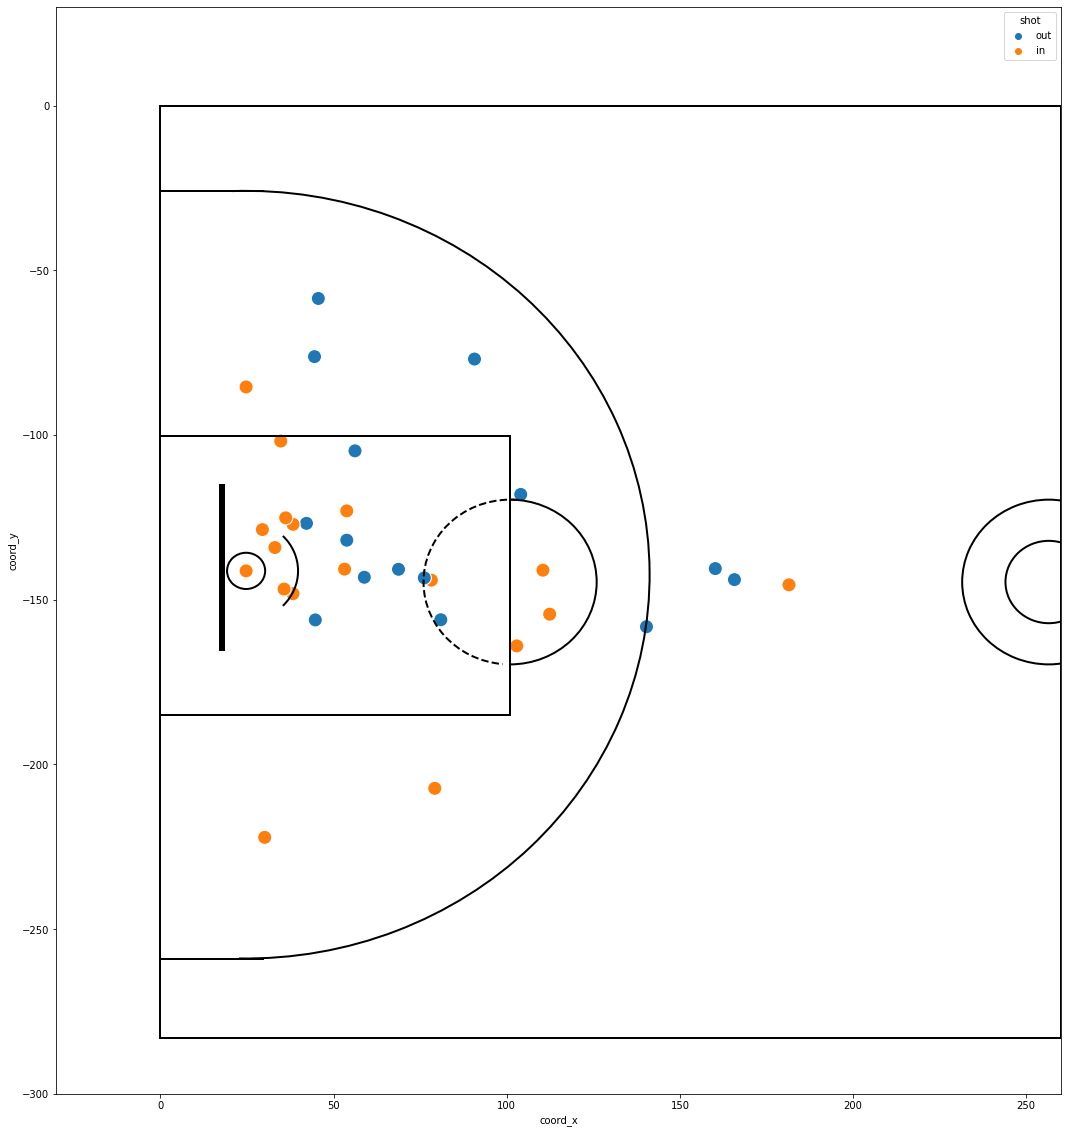

In [125]:
mapa("P. Gasol")